# Compare MERRA-2 and IMAU AWS ISWR and ILWR
### First Import python modules

# Current Experiments
1. Can I make the bias match my expectation.
2. How can I justify the bias correction. I.e. why did I choose constant offset vs. percentange increase?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from Load_and_Process_Datasets import *
from statistics import mean
from scipy import stats

### User Editable Variables

In [25]:
# Incoming longwave
column_str = "Incoming_Longwave"
obs_column = 13
model_column = "ILWR"
site_num = [4, 5, 6, 8, 9, 10, 11, 12]
site_str = ["04", "05", "06", "08", "09", "10", "11", "12"]

# # Incoming shortwave
# column_str = "Incoming_Shortwave"
# obs_column = 11
# model_column = "ISWR"
# site_num = [4, 5, 6, 9, 10, 11, 12, 16]
# site_str = ["04", "05", "06", "09", "10", "11", "12", "16"]



### Bias Scatter Plot Function

In [26]:
# bc is a boolean variable: if true, use bias corrected, if false use not bias corrected
def bias_scatter(site_num, column_str, obs_column, model_var, bc):
    model = {}
    obs = {}
    
    # Create figure object
    fig = plt.figure(figsize=(15,15))
    
    # Loop through each site
    for k in range(0,len(site_num)):
#     for k in range(0, 1):
        # Get .smet output path and IMAU weather station path
        obs_path = "/pl/active/nasa_smb/Data/AWS_DML/ant_aws" + str(site_num[k]) + "_DAY.txt"
        
        # Model Path
        if bc == True:
            # Bias Corrected Path
            model_path = "/projects/erke2265/1D_Snowpack/Simulations/bias_corrected_radiation/AWS_" + str(site_num[k]) + "/output/AWS_" + str(site_num[k]) + ".smet"
        else:
            # Not Bias Corrected Path
            model_path = "/projects/erke2265/1D_Snowpack/Simulations/not_bias_corrected_radiation/AWS_" + str(site_num[k]) + "/output/AWS_" + str(site_num[k]) + ".smet"

        # Import Data
        obs_ts = AWS.get_IMAU_timeseries(obs_path, obs_column)
        model_ts = snwpck_1D.get_smet_timeseries(model_path, model_var)

        # Convert from Kelvin to Celsius for temperature variables
        temperature_columns = [3, 4, 5, 6]
        if (obs_column in temperature_columns):
            obs_ts = obs_ts - 273.15

        # Resample model to daily mean
        model_ts = model_ts.resample('M').mean()
        obs_ts = obs_ts.resample('M').mean()
        
        ## Create arrays for plotting
        index = pd.DatetimeIndex(start=datetime(1980, 1, 1), end=datetime(2018, 12, 31), freq='M')
        model_ts = model_ts.reindex(index)
        obs_ts = obs_ts.reindex(index)
        
        # Update dictionary
        model[k] = model_ts
        obs[k] = obs_ts

        # Plot
        model_min = model_ts.min()
        model_max = model_ts.max()
        obs_min = obs_ts.min()
        obs_max = obs_ts.max()
        maxima = int(np.maximum(model_max, obs_max)) + 1
        minima = int(np.minimum(model_min, obs_min))
        if minima == 0:
            minima = int(obs_min)
        
        x = range(int(minima), int(maxima))
        y = x
        
        ax = plt.subplot(3, 3, k + 1)
        plt.plot(obs_ts, model_ts, 'bo')
        plt.plot(x, y, 'k--')
        ax.grid()
#         plt.xlim(minima, maxima)
#         plt.ylim(minima, maxima)
        plt.title(column_str + ": AWS " + str(site_num[k]))
        plt.xlabel("IMAU Observed")
        plt.ylabel("MERRA-2 Modeled")
        
    return model, obs
        

### Plot Site Bias Scatter



/projects/erke2265/miniconda/envs/a3d/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.


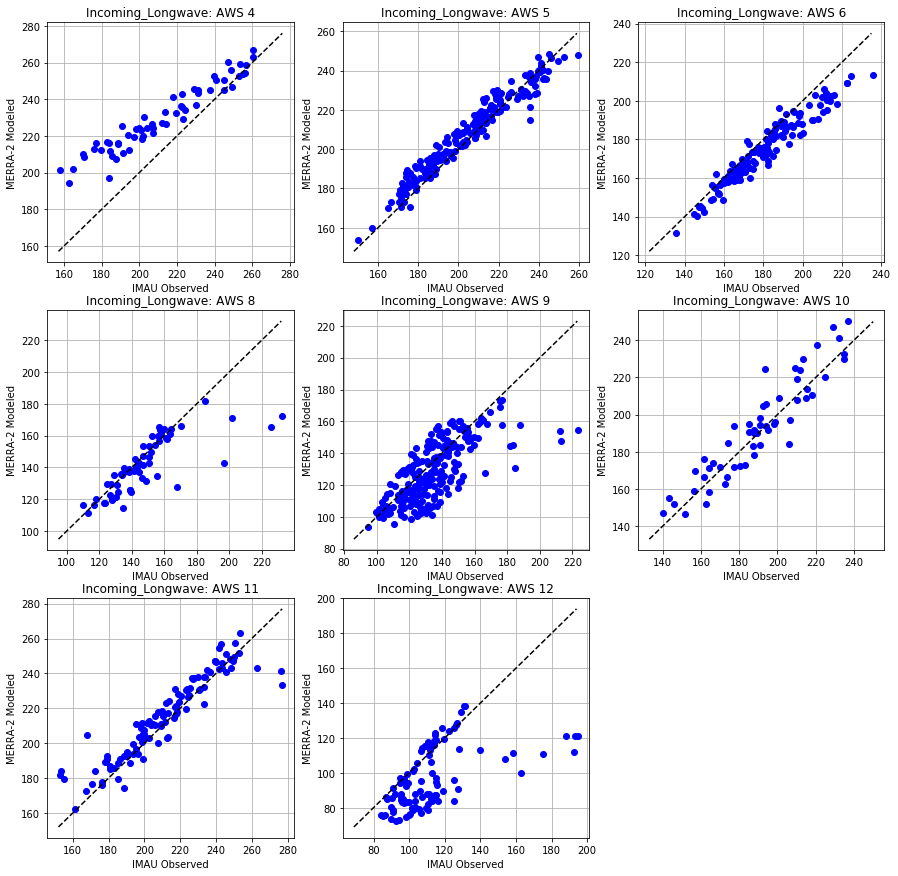

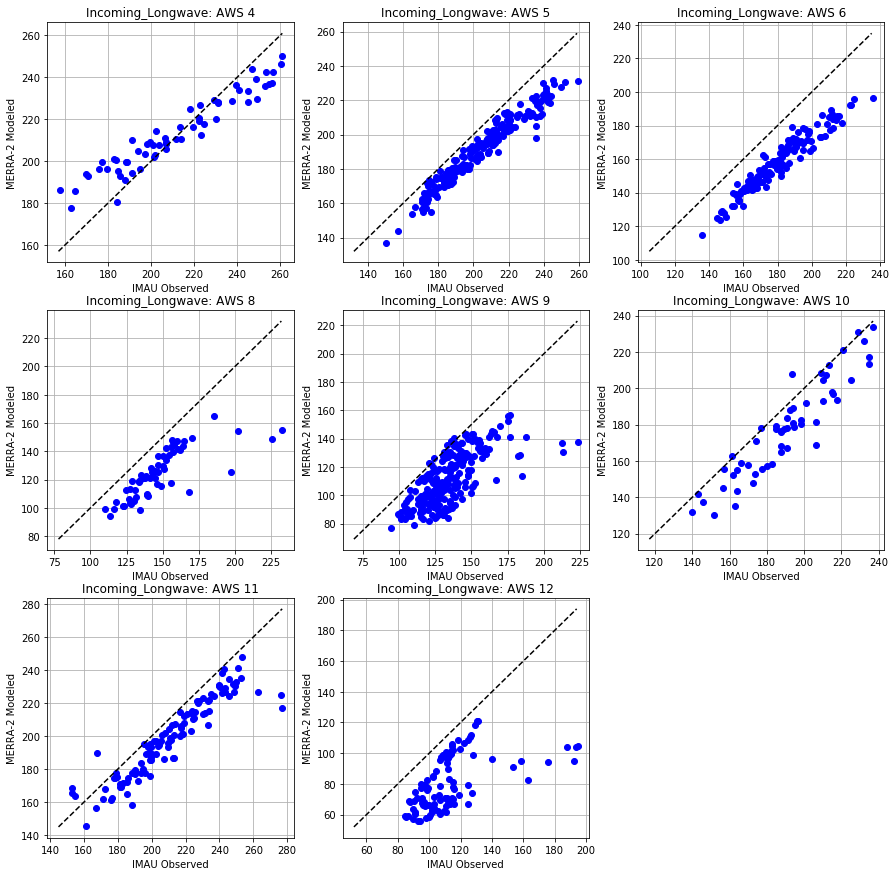

In [27]:
bc_model, bc_obs = bias_scatter(site_num, column_str, obs_column, model_column, True)
nbc_model, nbc_obs = bias_scatter(site_num, column_str, obs_column, model_column, False)

# Bias corrected minus non bias corrected

In [28]:
diff = np.zeros(len(site_num))
for j in range(0, len(site_num)):
    diff[j] = np. nanmean(bc_model[j] - nbc_model[j])
    print(diff[j])
print()
print(diff.mean())

16.12997942192006
16.297633214808958
16.739638140243525
16.581311743439787
16.607864686079413
15.22971343937433
15.94754962100303
16.874371767896715

16.301007754345726


# Bias corrected divided non bias corrected

In [29]:
ratio = np.zeros(len(site_num))
for j in range(0, len(site_num)):
    ratio[j] = np. nanmean(bc_model[j] / nbc_model[j])
    print(ratio[j])
print()
print(ratio.mean())

1.0778310946147185
1.0862438778067325
1.107184802000202
1.1345351103062027
1.1540504611052018
1.0898235673818921
1.0811776304441598
1.2251872865066948

1.1195042287707255


# Non-bias corrected divided by observations

In [30]:
ratio = np.zeros(len(site_num))
for j in range(0, len(site_num)):
    ratio[j] = np.nanmean(nbc_model[j] / nbc_obs[j])
    print(ratio[j])
print()
print(ratio.mean())

1.0165827437288184
0.9377232295190174
0.8751591959507384
0.84994303997505
0.8327999553675074
0.9351421289975577
0.9454053741961912
0.7240132986140314

0.889596120793614


# Bias corrected divided by observations

In [31]:
ratio = np.zeros(len(site_num))
for j in range(0, len(site_num)):
    ratio[j] = np.nanmean(bc_model[j] / bc_obs[j])
    print(ratio[j])
print()
print(ratio.mean())

1.0947627629307506
1.0179247383175876
0.9688659293361591
0.9648253051647627
0.959193339195293
1.0153534406508946
1.021698820828642
0.8785565335015653

0.9901476087407068


### Calculate R-Squared and RMSE for all AWS. Then report mean value.


In [32]:
### Bias Corrected
bc_RMSE = np.zeros(len(site_num))
bc_bias = np.zeros(len(site_num))
bc_offset = np.zeros(len(site_num))
bc_factor = np.zeros(len(site_num))

for j in range(0, len(site_num)): 
    bcobs = bc_obs[j].dropna()
    index = bcobs.index
    bcmod = bc_model[j].reindex(index)
    bcobs = np.array(bcobs.values).flatten()
    bcmod = np.array(bcmod.values).flatten()
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(bcobs, bcmod)
    bc_RMSE[j] = utilities.calc_rmse(bcobs, bcmod)
    bc_bias[j] = utilities.calc_bais(bcobs, bcmod)
    bc_factor[j] = np.mean(bcmod / bcobs)

### Not Bias Corrected
nbc_RMSE = np.zeros(len(site_num))
nbc_bias = np.zeros(len(site_num))
nbc_factor = np.zeros(len(site_num))

for j in range(0, len(site_num)): 
    nbcobs = nbc_obs[j].dropna()
    index = nbcobs.index
    nbcmod = nbc_model[j].reindex(index)
    nbcobs = np.array(nbcobs.values).flatten()
    nbcmod = np.array(nbcmod.values).flatten()
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(nbcobs, nbcmod)
    nbc_RMSE[j] = utilities.calc_rmse(nbcobs, nbcmod)
    nbc_bias[j] = utilities.calc_bais(nbcobs, nbcmod)
    
### Print Values
print(nbc_RMSE.mean())    
print(nbc_bias.mean()) 
print(bc_RMSE.mean())    
print(bc_bias.mean()) 

21.47548195532132
-16.885106372338193
14.12495254934127
-0.6048451514894491


### Make RMSE and Bias strings

In [33]:
nbc_RMSE_str = "RMSE: " + str(round(nbc_RMSE.mean(), 1)) + " Wm$^{-2}$"
nbc_Bias_str = "Bias: " + str(round(nbc_bias.mean(), 1)) + " Wm$^{-2}$"
bc_RMSE_str = "RMSE: " + str(round(bc_RMSE.mean(), 1)) + " Wm$^{-2}$"
bc_Bias_str = "Bias: " + str(round(bc_bias.mean(), 1)) + " Wm$^{-2}$"

### Plot all AWS

RMSE: 21.5 Wm$^{-2}$
Bias: -16.9 Wm$^{-2}$
RMSE: 14.1 Wm$^{-2}$
Bias: -0.6 Wm$^{-2}$

1.0165827437288184
1.0947627629307506

0.9377232295190174
1.0179247383175876

0.8751591959507384
0.9688659293361591

0.84994303997505
0.9648253051647627

0.8327999553675074
0.959193339195293

0.9351421289975577
1.0153534406508946

0.9454053741961912
1.021698820828642

0.7240132986140314
0.8785565335015653

Average Factors
Non-bias corrected = 0.7240132986140314
bias corrected = 0.8785565335015653


0.2759867013859686

<Figure size 432x288 with 0 Axes>

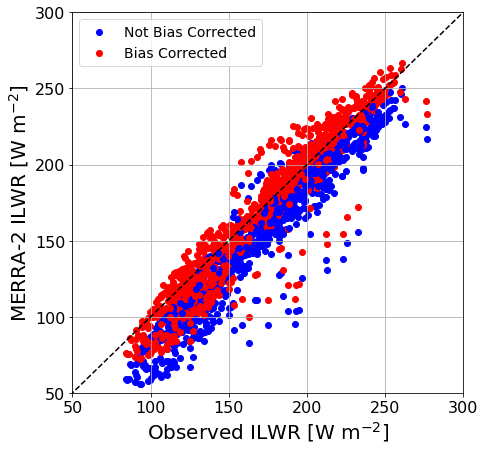

In [34]:
# Initialize factor arrays
nbc_factor = np.zeros(len(site_num))
bc_factor = np.zeros(len(site_num))
thresh = 3

# Print Stats
print(nbc_RMSE_str)
print(nbc_Bias_str)
print(bc_RMSE_str)
print(bc_Bias_str)
print()

# Make figure
plt.figure(1)
fig1 = plt.figure(figsize = (7, 7))

for j in range(0, len(site_num)):
    if j == 0:
        plt.scatter(nbc_obs[j], nbc_model[j], color = 'b', label = 'Not Bias Corrected')
        plt.scatter(bc_obs[j], bc_model[j], color = 'r', label = 'Bias Corrected')
        nbc_factor = np.nanmean(nbc_model[j][nbc_obs[j] > thresh] / nbc_obs[j][nbc_obs[j] > thresh])
        bc_factor = np.nanmean(bc_model[j][bc_obs[j] > thresh] / nbc_obs[j][bc_obs[j] > thresh])
        print(nbc_factor)
        print(bc_factor)
        print()
    else:
        plt.scatter(nbc_obs[j], nbc_model[j], color = 'b')
        plt.scatter(bc_obs[j], bc_model[j], color = 'r')
        nbc_factor = np.nanmean(nbc_model[j][nbc_obs[j] > thresh] / nbc_obs[j][nbc_obs[j] > thresh])
        bc_factor = np.nanmean(bc_model[j][bc_obs[j] > thresh] / nbc_obs[j][bc_obs[j] > thresh])
        print(nbc_factor)
        print(bc_factor)
        print()

# For ISWR
if column_str == "Incoming_Shortwave":
    plt.plot([-100, 700], [-100, 700], 'k--')
    plt.xlim([0, 550])
    plt.ylim([0, 550])
#     plt.xlim([0, 10])
#     plt.ylim([0, 10])
#     plt.text(225, 95, nbc_RMSE_str, c = 'b', fontsize = 12)
#     plt.text(225, 80, nbc_Bias_str, c = 'b', fontsize = 12)
#     plt.text(225, 65, bc_RMSE_str, c = 'r', fontsize = 12)
#     plt.text(225, 50, bc_Bias_str, c = 'r', fontsize = 12)
    plt.grid()
    plt.xlabel("Observed " + model_column + " [W m$^{-2}$]", fontsize = 20)
    plt.ylabel("MERRA-2 " + model_column + " [W m$^{-2}$]", fontsize = 20)
    plt.legend(fontsize = 14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig('Figures/Bias_Correction_' + model_column + ".pdf", format='pdf', dpi=100)

# For ILWR
else:
    plt.plot([-100, 700], [-100, 700], 'k--')
    plt.grid()
    plt.xlim([50, 300])
    plt.ylim([50, 300])
#     plt.text(225, 95, nbc_RMSE_str, c = 'b', fontsize = 12)
#     plt.text(225, 80, nbc_Bias_str, c = 'b', fontsize = 12)
#     plt.text(225, 65, bc_RMSE_str, c = 'r', fontsize = 12)
#     plt.text(225, 50, bc_Bias_str, c = 'r', fontsize = 12)
    plt.legend(fontsize = 14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Observed " + model_column + " [W m$^{-2}$]", fontsize = 20)
    plt.ylabel("MERRA-2 " + model_column + " [W m$^{-2}$]", fontsize = 20)
    plt.savefig('Figures/Bias_Correction_' + model_column + ".pdf", format='pdf', dpi=100)
    
# Print average factors
print("Average Factors")
print("Non-bias corrected = " + str(np.nanmean(nbc_factor)))
print("bias corrected = " + str(np.nanmean(bc_factor)))
1 - np.nanmean(nbc_factor)

## Calculate the linear regression for each weather station, then take the mean of the offset and factor

# Load in ILWR timeseries from forcing .smet file

In [35]:
####### Input
# thresh_min = 35
# thresh_max = 350
# site = "4"
# path = "/projects/erke2265/1D_Snowpack/Simulations/not_bias_corrected_radiation/AWS_" + site + "/AWS_" + site + ".smet"
# col = 5
# forcing_ILWR = np.loadtxt(path, skiprows=11, usecols=(col))
# plt.plot(data)
# minima = 16.92 + forcing_ILWR.min()
# maxima = 16.92 + forcing_ILWR.max()
# print(minima)
# print(maxima)

# if minima < thresh_min or maxima > thresh_max:
#     print("Filtered!")
# else:
#     print("Not Filtered!")



# ####### Output
# site = "4"
# path = "/projects/erke2265/1D_Snowpack/Simulations/not_bias_corrected_radiation/AWS_" + site + "/output/AWS_" + site + ".smet"
# var = "ILWR"
# output_ILWR = snwpck_1D.get_smet_timeseries(path, var)